In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sys

plt.style.use("../matplotlib_style/standard_plot_style.mplstyle")

import qutip

save_figures = True
save_path    = "/mnt/c/Users/johan/OneDrive/Skrivebord/Master_Thesis/Figs/Results/readout_strategies"

sys.path.append("../utils")


In [26]:
from qutip import basis, tensor, destroy, qeye, sigmaz
resonator_states = 20
readout_states   = 2

resonator_frequency = 5.0 * 2 * np.pi
dispersive_shift    = 0.1 * 2 * np.pi

initial_state = tensor(basis(readout_states, 1), basis(resonator_states, 0))

a = destroy(resonator_states)
H = resonator_frequency * tensor(qeye(2), a.dag() * a) + dispersive_shift * tensor(sigmaz(), a.dag() * a) + resonator_frequency * tensor(qeye(readout_states), a.dag() + a)

c_ops = [np.sqrt(0.1) * tensor(qeye(2), a), np.sqrt(0.1) * tensor(destroy(readout_states), qeye(resonator_states))]

In [27]:
from qutip import mesolve

result = mesolve(
    H, 
    initial_state, 
    np.linspace(0, 100, 1000), 
    c_ops
)


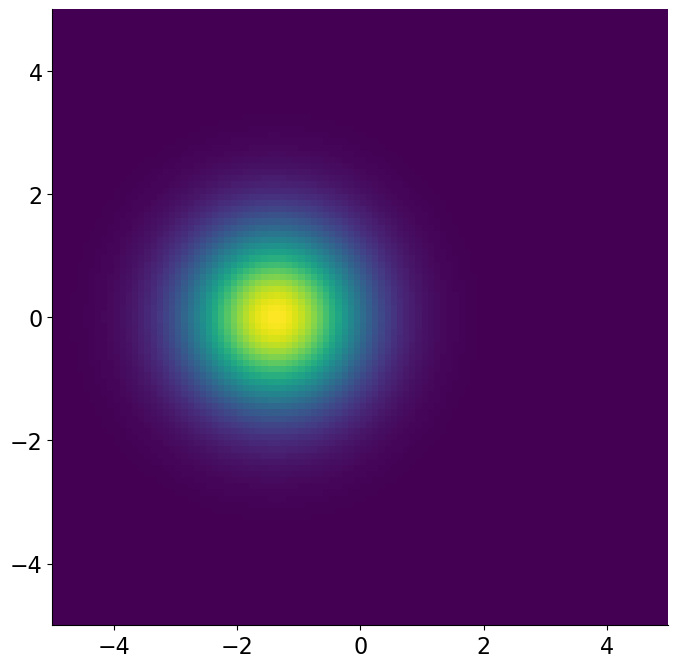

In [28]:
from qutip import QFunc

qfunc = QFunc(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

plt.imshow(qfunc(result.states[-1].ptrace(1)), origin="lower", extent=[-5, 5, -5, 5])